# EDA

## Apa itu EDA

> [Exploratory Data Analysis (EDA)](https://www.itl.nist.gov/div898/handbook/eda/section1/eda1.htm) adalah sebuah pendekatan untuk memahami data. EDA dilakukan dengan pendekatan statistik maupun visual. 


Dengan melakukan EDA, berikut manfaat yang diperoleh:
1. Memahami permasalahan yang ada pada data kita, sehingga dapat merencanakan langkah-langkah data cleansing (pada step data preparation)
2. Merumuskan pertanyaan-pertanyaan bisnis lain, sehingga dapat mempertajam pertanyaan bisnis yang merupakan hasil dari step data understanding
3. Menghasilkan output berupa hasil analisis deskriptif yang dapat disajikan pada visualisasi data dan dashboard. Output ini kadang terasa cukup sebagai bahan pertimbangan pengambilan keputusan. 

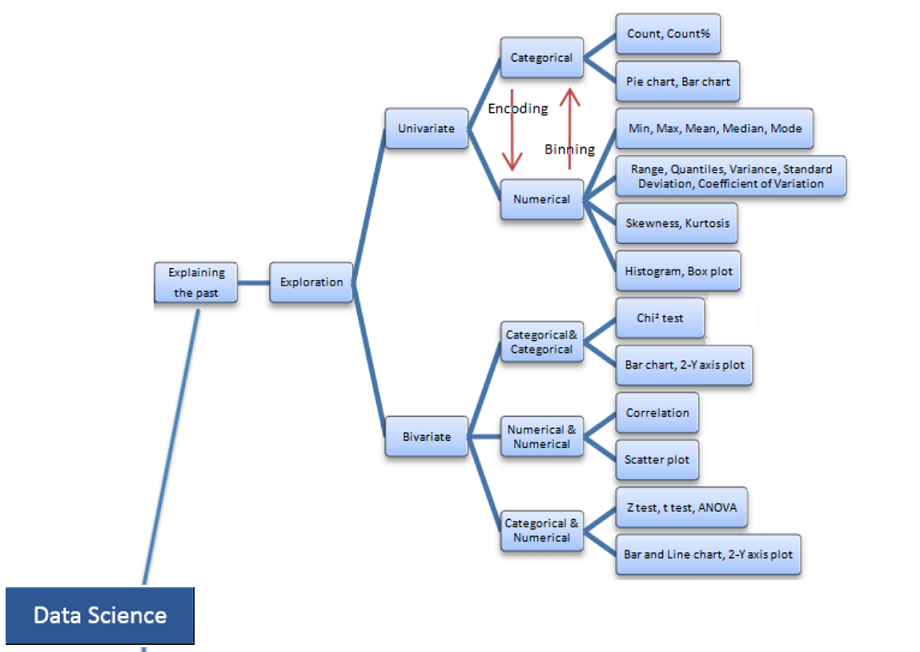

In [3]:
# contoh sederhana
import numpy as np

# membuat variable data
x = np.array([10.00, 8.00, 13.00, 9.00, 11.00, 14.00, 6.00, 4.00, 12.00, 7.00, 5.00])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

# menjadikan data tersebut sebagai dataframe
dataset = pd.DataFrame({'x': x, 'y': y}, columns = ['x', 'y'])

# print dataset
dataset

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


In [ ]:
# melihat statistik sederhana dari dataset
dataset.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


D:\SOFTWARE\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


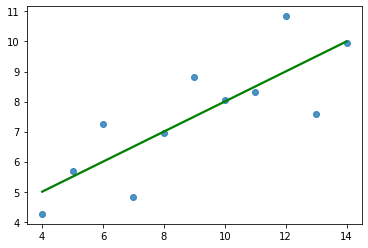

In [ ]:
# EDA menggunakan scatter plot
import seaborn as sns

sns.regplot(x, y, ci=None, line_kws={'color': 'green'})

[Knowlegde tambahan](https://www.itl.nist.gov/div898/handbook/eda/section1/eda16.htm):
1. Data yang ada tersebar di linear curve
2. Tidak ada outlier

## EDA dengan D-Tale

> [D-Tale](https://pypi.org/project/dtale/) is the combination of a Flask back-end and a React front-end to bring you an easy way to view & analyze Pandas data structures.

Keunggulannya:
1. Mudah digunakan.
2. Terintegrasi dengan ipython notebooks dan python/ipython terminals.
3. Sudah support DataFrame, Series, MultiIndex, DatetimeIndex & RangeIndex.

In [5]:
#!pip3 install dtale

In [2]:
import pandas as pd
df_titanic = pd.read_csv('https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/04.%20Data%20Preparation/dataset/titanic.csv')

In [3]:
#import dtale
#dtale.show(df_titanic)

Hal yang akan kita eksplore menggunakan dtale.
1. Describe, Histogram, Categories, [Q-Q plot](https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0)
2. Cek outlier
3. Cek korelasi antara kolom
4. Cek missing value
5. Charts (mirip dengan point 1)

## EDA dan Manipulasi dengan Bamboolib

In [1]:
#!pip3 install bamboolib

In [6]:
#import bamboolib as bam
#df_titanic

# Missing Value and Outlier

Hasil EDA menunjukkan fakta berikut:
1. Terdapat missing value pada kolom ```Age```, ```Cabin```, ```Embarked```.
2. Outlier pada kolom ```Fare```.

## Penanganan Missing Value

Kenapa masalah Missing Value harus kita atasi?

> Missing values are common occurrences in data. Unfortunately, most predictive modeling techniques cannot handle any missing values. Therefore, this problem must be addressed prior to modeling.

Feature Engineering and Selection, 2019.

3 Tipe [Missing Value](https://blog.usejournal.com/missing-data-its-types-and-statistical-methods-to-deal-with-it-5cf8b71a443f):
1. Missing completely at random (MCAR). 
2. Missing at random (MAR). 
3. Missing not random (MNAR). 

<details>
<br>
Misal kita diminta untuk membuat model dari Age (Y) yang dipengaruhi oleh jenis kelamin (X) beberapa responden tidak memberikan jawaban atas pertanyaan berapa berat mereka. <br>
1. MCAR terjadi jika tidak ada alasan yang jelas kenapa responden tidak memberikan jawaban.<br>
2. MAR terjadi jika orang yang berjenis kelamin perempuan akan cenderung tidak memberikan jawaban jika ditanya berat, jadi missing value Y dipengaruhi oleh X.<br>
3. MNAR terjadi jika orang dengan kelas penghasilan tertentu, memiliki kecenderungan tidak memberikan jawaban. Sehingga missing value Y dipengaruhi oleh nilai lain yang tidak teramati.
</details>

Beberapa fungsi utama yang digunakan:
1. [library ```missingno```](https://github.com/ResidentMario/missingno)
2. [```df.isnull()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)
3. [```df.fillna()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
4. [```df.groupby()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
5. [```df.loc()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)
6. [```df.column.plot()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html)
7. [```df.column.skew()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.skew.html)
8. [```df.column.value_counts()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

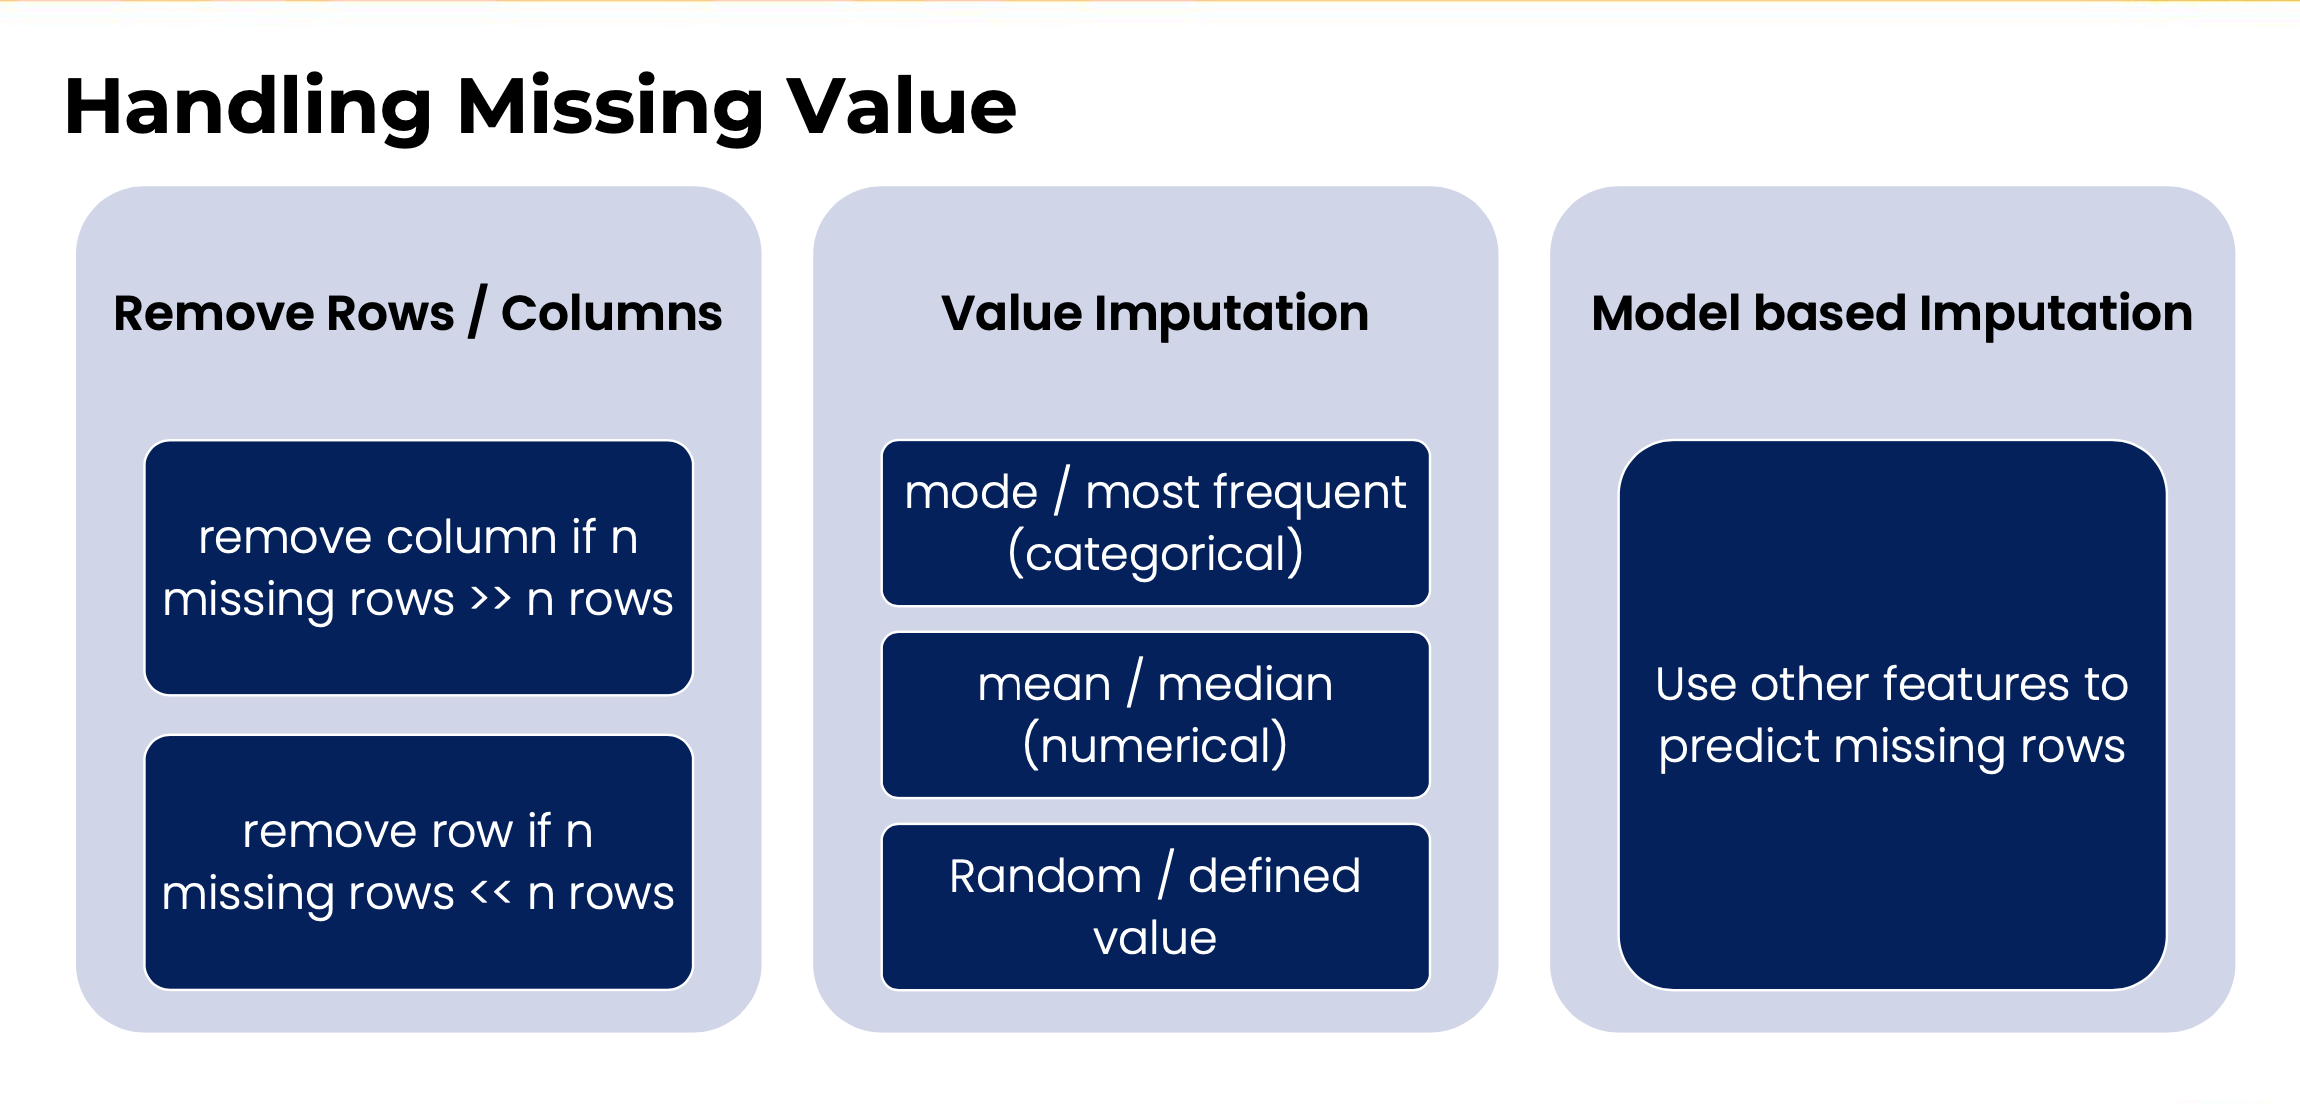

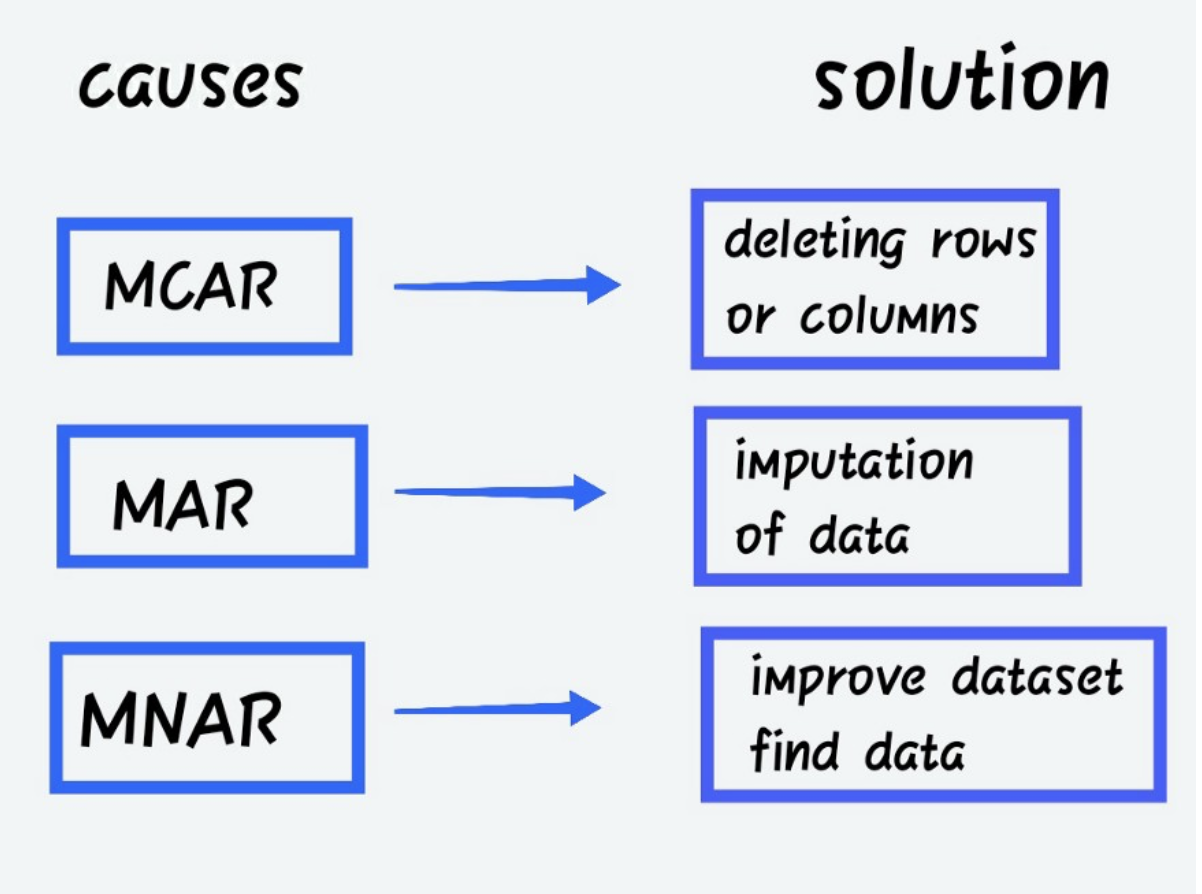

In [7]:
# lihat missing value dengan fungsi .isnul()
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

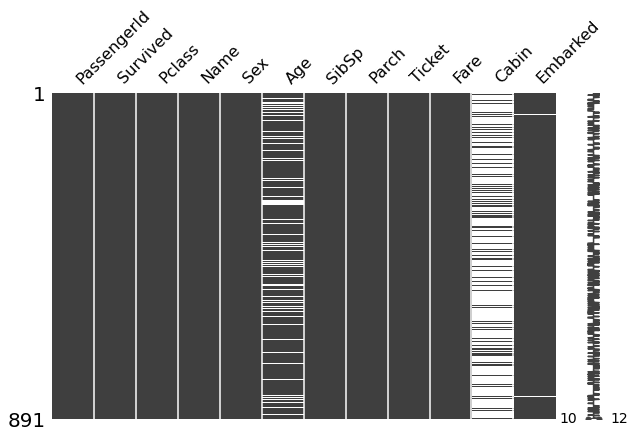

In [9]:
# visualiasi missing value dengan bantuan library
import missingno as msno
msno.matrix(df_titanic, figsize=(10, 6))

> Pertanyaan: missing value itu __dihapus__ atau bagaimana?

### Menghapus missing value

**Hapus Baris yang NA**

- `.dropna(how='any')`: hapus baris apabila memiliki **minimal 1 kolom** nilai missing value

- `.dropna(how='all')`: hapus baris apabila memiliki **semua kolom** nilai missing


In [34]:
df_titanic_2=df_titanic.copy()

In [35]:
df_titanic_2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df_titanic_2.dropna(subset=['Age'], how='all', inplace=True)
df_titanic_2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [36]:
df_titanic_2.dropna(how='all', inplace=True)
df_titanic_2.shape

(891, 12)

In [37]:
df_titanic_2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Single Imputasi

#### Kolom Age

__Imputasi dengan mean atau median (Univariate)__ <br>

Metode pertama yang kita implementasikan adalah mengisi missing value dengan mean atau median berdasarkan perhitungan keseluruhan kolom ```Age``` saja.<br>

Hasilnya kita dapat memperhasikan efek yang berbeda dari pengisian tersebut dengan metode tersebut.

__Sebelum imputasi__

<AxesSubplot:title={'center':'Age Sebelum Imputasi'}, ylabel='Frequency'>

2022-06-20 00:09:50,223 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


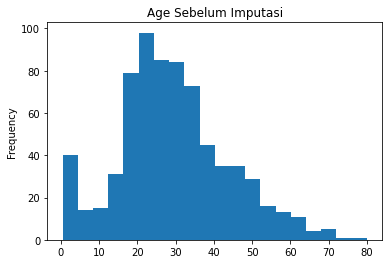

In [ ]:
# melihat distribusi awal dari kolom Age
df_titanic.Age.plot.hist(title="Age Sebelum Imputasi", bins=20)

In [ ]:
# melihat kecondongan distribusi kolom Age. Kecondongan yang baik itu dari -1 sampai dengan 1
df_titanic.Age.skew()

0.38910778230082704

In [ ]:
df_titanic.Age.mean()

29.69911764705882

In [ ]:
df_titanic.Age.median()

28.0

__Imputasi__

In [ ]:
# fungsi fillna di pandas dapat digunakan untuk imputasi missing values
# taruh hasilnya di variable baru untuk mempermudah pengamatan
df_titanic['Age_mean_uni'] = df_titanic.Age.fillna(df_titanic.Age.mean())
df_titanic['Age_median_uni'] = df_titanic.Age.fillna(df_titanic.Age.median())

__Setelah imputasi__

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Age_mean_uni'}>],
       [<AxesSubplot:title={'center':'Age_median_uni'}>, <AxesSubplot:>]],
      dtype=object)

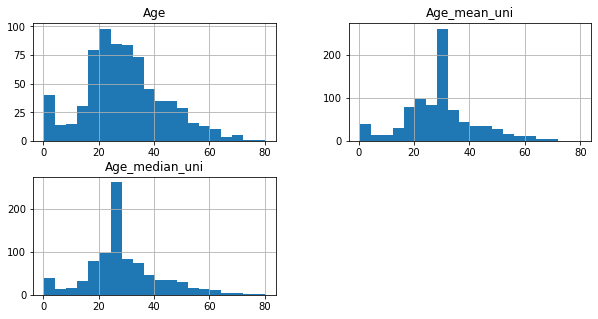

In [ ]:
# melihat histogram sebelum dan sesudah imputasi 
df_titanic[['Age', 'Age_mean_uni','Age_median_uni']].hist(bins=20, figsize=(10,5))

In [ ]:
# skewness sebelum dan sesudah imputasi
df_titanic[['Age', 'Age_mean_uni','Age_median_uni']].skew()

Age               0.389108
Age_mean_uni      0.434488
Age_median_uni    0.510245
dtype: float64

__Imputasi dengan Mean berdasarkan kelompok/parameter lain (Multivariate)__ <br>

Solusi alternatif jika kita ingin melakukan imputasi missing value, dibandingkan kita memukul rata isian missing value pada kolom ```Age``` dengan mean atau median dari seluruh data. <br>

Kita bisa mengelompokan terlebih dahulu berdasarkan kolom lain (dalam hal ini adalah ```Sex``` sehingga imputasi dilakukan terhadap kelompok yang sama sehingga diharapkan hasilnya lebih <i>smooth</i>.

__Sebelum imputasi__

In [9]:
# mengetahui mean per kelompok sex, kita menggunakan groupby
df_grouped = df_titanic[['Sex', 'Age']].groupby(['Sex']).mean()
df_grouped

,Age
Sex,
female,27.915709
male,30.726645


__Imputasi__

Setelah mengetahui mean dari masing-masing group, kita bisa melakukan imputasi.

In [10]:
# imputasi untuk male group

# filter kondisi 
condition = df_titanic['Sex'] == 'male'

# tangkap nilai mean untuk laki2
mean_male = df_grouped.loc['male','Age']

# imputasi
df_titanic.loc[condition, 'Age_mean_multi'] = df_titanic.loc[condition,'Age'].fillna(mean_male)

In [11]:
# proses untuk female sama seperti diatas
condition = df_titanic['Sex'] == 'female'
mean_female = df_grouped.loc['female','Age']
df_titanic.loc[condition, 'Age_mean_multi'] = df_titanic.loc[condition,'Age'].fillna(mean_female)

__Setelah imputasi__

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Age_mean_uni'}>],
       [<AxesSubplot:title={'center':'Age_mean_multi'}>, <AxesSubplot:>]],
      dtype=object)

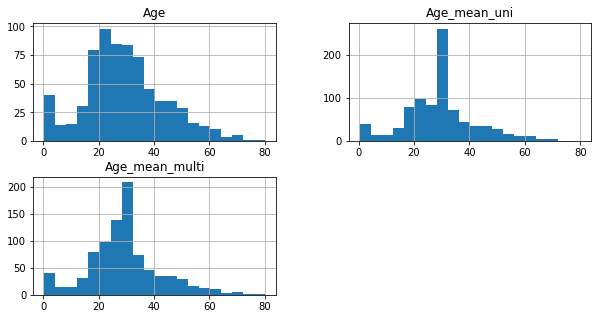

In [ ]:
# melihat histogram sebelum dan sesudah imputasi 
df_titanic[['Age', 'Age_mean_uni','Age_mean_multi']].hist(bins=20, figsize=(10,5))

In [ ]:
# skewness sebelum dan sesudah imputasi
df_titanic[['Age', 'Age_mean_uni','Age_mean_multi']].skew()

Age               0.389108
Age_mean_uni      0.434488
Age_mean_multi    0.424586
dtype: float64

__Simpulan__: Melihat hasil skewness dari ```Age_mean_multi``` yang cukup bagus (mendekati 0), kita memilih hasil ini untuk digunakan sebagai parameter bantu pada analisis selanjutnya. 

Namun dibuka kemungkinan apabila saat implementasi model, peforma dari model masih tidak sesuai harapan, ```Age_mean_multi``` dapat diganti dengan ```Age_mean_uni```.

### Kolom Cabin

Pada kolom ```Cabin``` dikarenakan mayoritas data adalah missing value dan kita punya tidak cukup ide untuk mengisinya. 

Apabila kita paksa imputasi akan sangat bias dan tidak bisa menggambarkan situasi sebenarnya.  

Maka, solusinya kolom ```cabin``` lebih baik dihilangkan menggunakan fungsi ```.drop()```.

In [38]:
df_titanic.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
# drop kolom menggunakan fungsi .drop()
df_titanic.drop(columns='Cabin', inplace = True)

In [ ]:
# cek sisa kolom
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_mean_uni', 'Age_median_uni',
       'Age_mean_multi'],
      dtype='object')

__Simpulan__: Kolom ```Cabin``` sudah tidak lagi menjadi fitur dalam pengembangan model.

### Kolom Embarked

In [ ]:
# cek value counts (size masing-masing kelas)
df_titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# cek detail data yang kosong
df_titanic[df_titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,38.0,38.0,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,62.0,62.0,62.0


In [ ]:
df_titanic.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

Kita bisa membuat dugaan awal bahwa kolom ```Embarked``` ini mungkin ada kaitannya dengan kolom lain yakni ```Ticket```. 

Untuk itu lakukan penelusuran, apakah ada nomor tiket dengan pola sejenis dengan data hilang.

In [ ]:
# polanya di cek dengan fungsi .match
# pola yang digunakan adalah cari tiket yang diawali dengan '113'

df_titanic[(df_titanic.Ticket.str.match('^113'))].sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,S,36.0,36.0,36.0
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1,S,19.0,19.0,19.0
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,S,14.0,14.0,14.0


In [ ]:
# Cek tiket dengan nomor yang sama df_titanic[(df_titanic.Ticket== '113776)]

In [ ]:
# cek distribusi count tiket dengan pola str '113'
df_titanic[df_titanic.Ticket.str.match('^113')].Embarked.value_counts()

S    41
C     4
Name: Embarked, dtype: int64

Dari distribusinya tiket dengan nomor seri 113, memiliki probabilitas lebih tinggi bahwa penumpang naik dari pelabuhan ```S```.

In [ ]:
# kita bisa menggunakan modus dari distribusinya, yaitu 'S'
# implementasi menggunakan fungsi .fillna()
df_titanic.Embarked.fillna('S', inplace = True)

In [ ]:
# cek setelah implementasi
df_titanic.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

__Simpulan__: Hasil imputasi missing values pada kolom ```Embarked```, menambah jumlah kategori ```S``` dari 644 ke 646.

### Multivariate Imputation via Chained Equations (MICE)


Misalkan kita memiliki variabel $x_1, x_2, x_3, ...x_n$. Pada dataset anda, variabel $x_2$ dan $x_3$, dan $x_5$ mengalami beberapa data yang hilang.
* Pada saat anda ingin memunculkan nilai yang hilang dari $x_2$ maka variabel yang hilang akan diregres terhadap variabel $x_1$, $x_3$,  $x_4 - x_5$ 
* Pada saat anda ingin memunculkan nilai yang hilang dari $x_3$ maka variabel yang hilang akan diregres terhadap variabel $x_1$, $x_2$,  $x_4 - x_5$ 
* dst

Secara default, regresi linear digunakan untuk memprediksi nilai yang hilang bila variabel yang diprediksi adalah variabel kontinu dan regresi logistik bila variabel yang hilang adalah variabel kategorikal.

In [45]:
#!pip3 install fancyimpute --user

In [43]:
import pandas as pd
import numpy as np
# importing the MICE from fancyimpute library
from fancyimpute import IterativeImputer
  
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4],
                   [5,      7,  8,     2],
                   [2,      5,  7,     9]],
                  columns = ['var1', 'var2', 'var3', 'var4'])
df

ModuleNotFoundError: No module named 'fancyimpute'

In [48]:
import pandas as pd
#calling the MICE Class
mice_imputer = IterativeImputer()

#imputing the missing value with mice imputer
df = mice_imputer.fit_transform(df)
df_mice = pd.DataFrame(df, columns=['var1', 'var2', 'var3','var4'])
df_mice



NameError: name 'IterativeImputer' is not defined

## Penanganan Outlier

Sumber:

1. https://www.mikulskibartosz.name/outlier-detection-with-scikit-learn/
2. https://www.kaggle.com/kevinarvai/outlier-detection-practice-uni-multivariate
3. https://nitin9809.medium.com/outlier-detection-and-treatment-part-1-aa0b09f60e50

Beberapa fungsi dan library yang digunakan:
1. library [```DBSCAN```](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).
2. library [```MinMaxScaler```](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).
3. [```df.quantile()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html).
4. [```df.mean()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html).
5. [```df.fillna()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna).
5. dst.

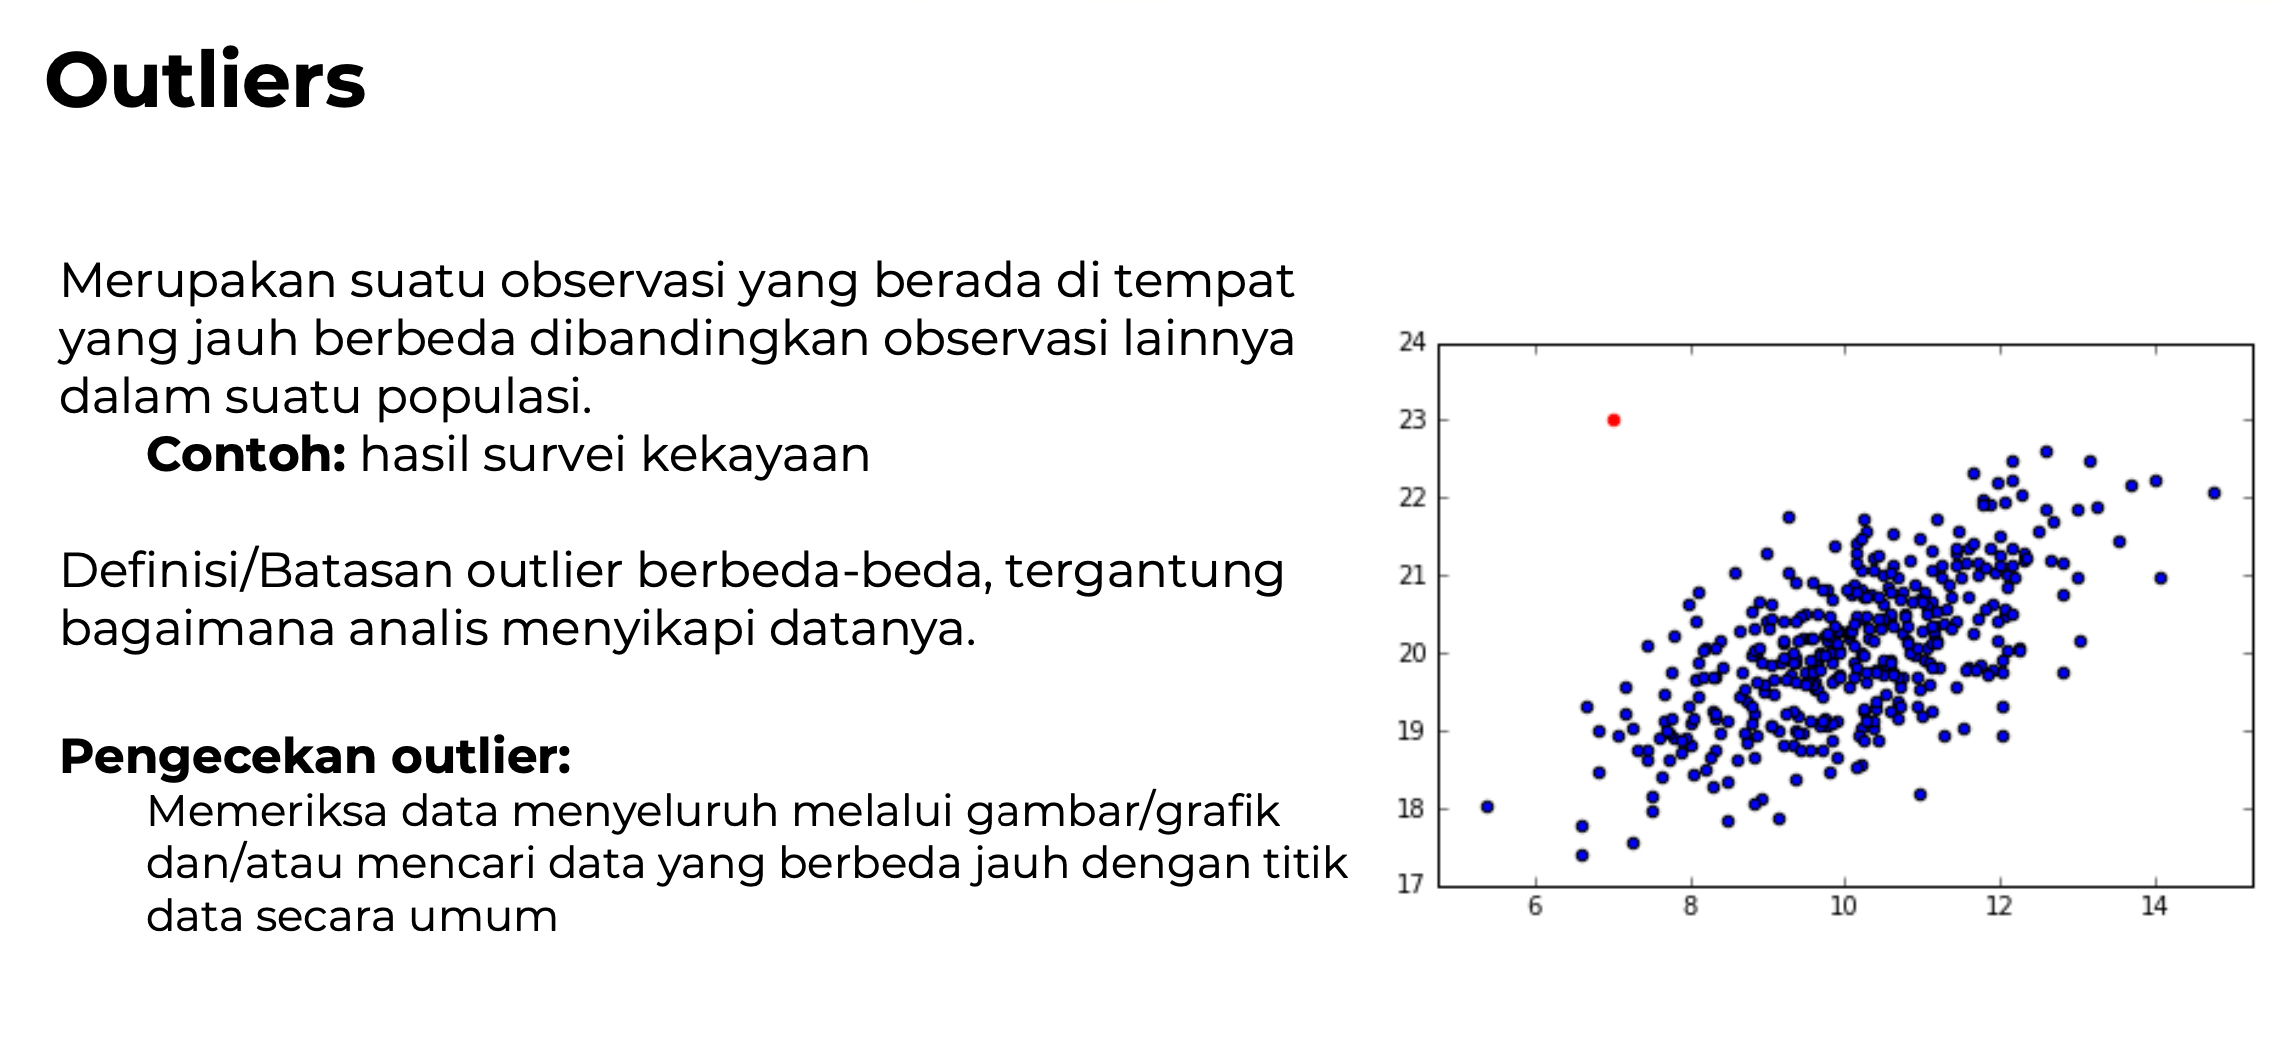

### Deteksi outlier secara univariate

__Three Sigma Rule__

## 1.1 Three Sigma Rule

![Sigma](https://miro.medium.com/max/1400/1*IZ2II2HYKeoMrdLU5jW6Dw.png)
$P(a−3σ<X<a+3σ)=0.99730$

Kriteria Outlier untuk **Three Sigma Rule** :
> $|x_K-\bar x|>3\sigma$

Keterangan :
* $x_K$ adalah data ke-$k$, 
* $\bar x$ adalah rata-rata data, 
* $\sigma$ adalah standar deviasi

In [51]:
# PEMBUATAN FUNGSI UNTUK KRITERIA OUTLIER
def three_sigma_outlier (df):
    if (abs(potassium-df['potassium'].mean())>(3*df['potassium'].std())):
        return "Outlier"
    else:
        return "Not Outlier"

In [52]:
import pandas as pd
df=pd.read_csv('Uscereal.csv')
df.head(8)

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched
5,Basic 4,G,173.33333,4.000000,2.666667,280.00000,2.666667,24.00000,10.666667,3,133.33333,enriched
6,Bran Chex,R,134.32836,2.985075,1.492537,298.50746,5.970149,22.38806,8.955224,1,186.56716,enriched
7,Bran Flakes,P,134.32836,4.477612,0.000000,313.43284,7.462687,19.40299,7.462687,3,283.58209,enriched


In [53]:
# LOAD FUNGSI UNTUK KRITERIA OUTLIER
def three_sigma_outlier (potassium):
    if (abs(potassium-df['potassium'].mean())>(3*df['potassium'].std())):
        return "Outlier"
    else:
        return "Not Outlier"

    # APLIKASI KE TABEL    
df['result_3sigma']=df['potassium'].apply(three_sigma_outlier)
df.head()

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched,Not Outlier
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched,Not Outlier


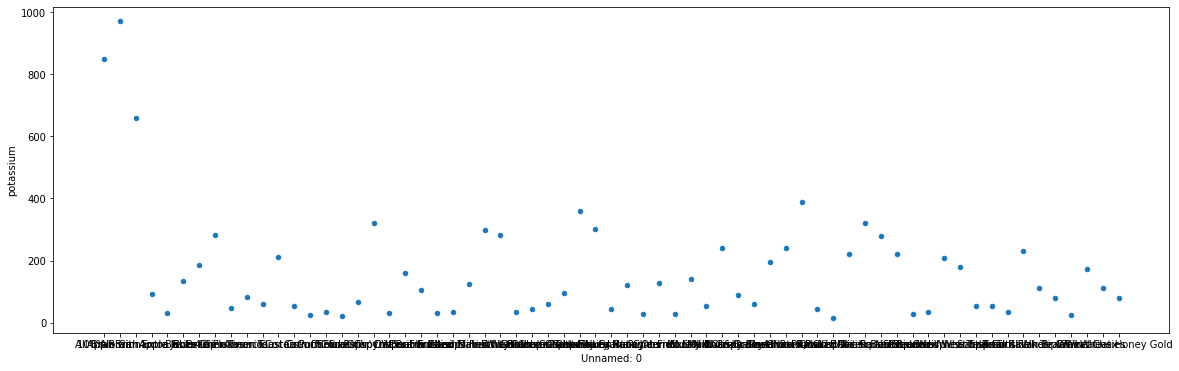

In [54]:
# VISUALISASI OUTLIER
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,6)

df.plot(x ='Unnamed: 0', y='potassium', kind = 'scatter')
plt.show()

In [55]:
# MELIHAT OUTLIER
df.loc[df['result_3sigma']=='Outlier']

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier


In [56]:
# JIKA HENDAK MEMBUAT DATASET BARU MENGELUARKAN OUTLIER
df_net=df.loc[df['result_3sigma']=='Not Outlier']
df_net.head()

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched,Not Outlier
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched,Not Outlier
5,Basic 4,G,173.33333,4.000000,2.666667,280.00000,2.666667,24.00000,10.666667,3,133.33333,enriched,Not Outlier
6,Bran Chex,R,134.32836,2.985075,1.492537,298.50746,5.970149,22.38806,8.955224,1,186.56716,enriched,Not Outlier


## 1.2 Hampel Identifier
Kriteria Outlier untuk Hampel Identifier :

> Median Absolute Value from The Median (MADM)

$MADM(x)=1.4826 \times median \{|x_K-x^+|\}$

Keterangan :
* $x_K$ adalah data ke $K$
* $x^+$ adalah median dari data

In [57]:
# BUAT KOLOM UNTUK $x_k-x+$
med=df['potassium'].quantile(0.55)
def abs_med_dev (potassium):
    return abs(potassium-med)

# amd absolut median deviation
df['amd']=df['potassium'].apply(abs_med_dev)
df.head()

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma,amd
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier,736.48485
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier,857.69697
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier,548.00000
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched,Not Outlier,18.66667
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched,Not Outlier,82.00000


In [58]:
med_abs = df['amd'].quantile(0.50)
def hampel_outlier (potassium):
    madm=1.4826*med_abs
    if (potassium>3*madm):
        return "Outlier"
    else:
        return "Not Outlier"
df['result_hampel']=df['potassium'].apply(hampel_outlier)
df.head()

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma,amd,result_hampel
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier,736.48485,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier,857.69697,Outlier
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier,548.00000,Outlier
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched,Not Outlier,18.66667,Not Outlier
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched,Not Outlier,82.00000,Not Outlier


In [59]:
# MELIHAT OUTLIER
df.loc[df['result_hampel']=='Outlier']

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma,amd,result_hampel
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier,736.48485,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier,857.69697,Outlier
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier,548.00000,Outlier
30,Grape-Nuts,P,440.00000,12.000000,0.000000,680.00000,12.000000,68.00000,12.000000,3,360.00000,enriched,Not Outlier,248.00000,Outlier
44,Post Nat. Raisin Bran,P,179.10448,4.477612,1.492537,298.50746,8.955224,16.41791,20.895522,3,388.05970,enriched,Not Outlier,276.05970,Outlier


## 1.3 Boxplot Outlier Rule

Kriteria Outlier untuk **Boxplot Outlier Rule** :
* $x_K>x_U+1.5Q$
* $x_K>x_L-1.5Q$

Keterangan :
* $x_K$ adalah data ke-$k$, 
* $x_U$ adalah kuartil ke-$1$ atau disebut kuartil bawah (*lower quartile*), 
* $x_L$ adalah kuartil ke-$3$ atau disebut kuartil bawah (*upper quartile*), 
* $Q$ adalah jangkuan interkuartil (selisih kuartil bawah - kuartil atas) 

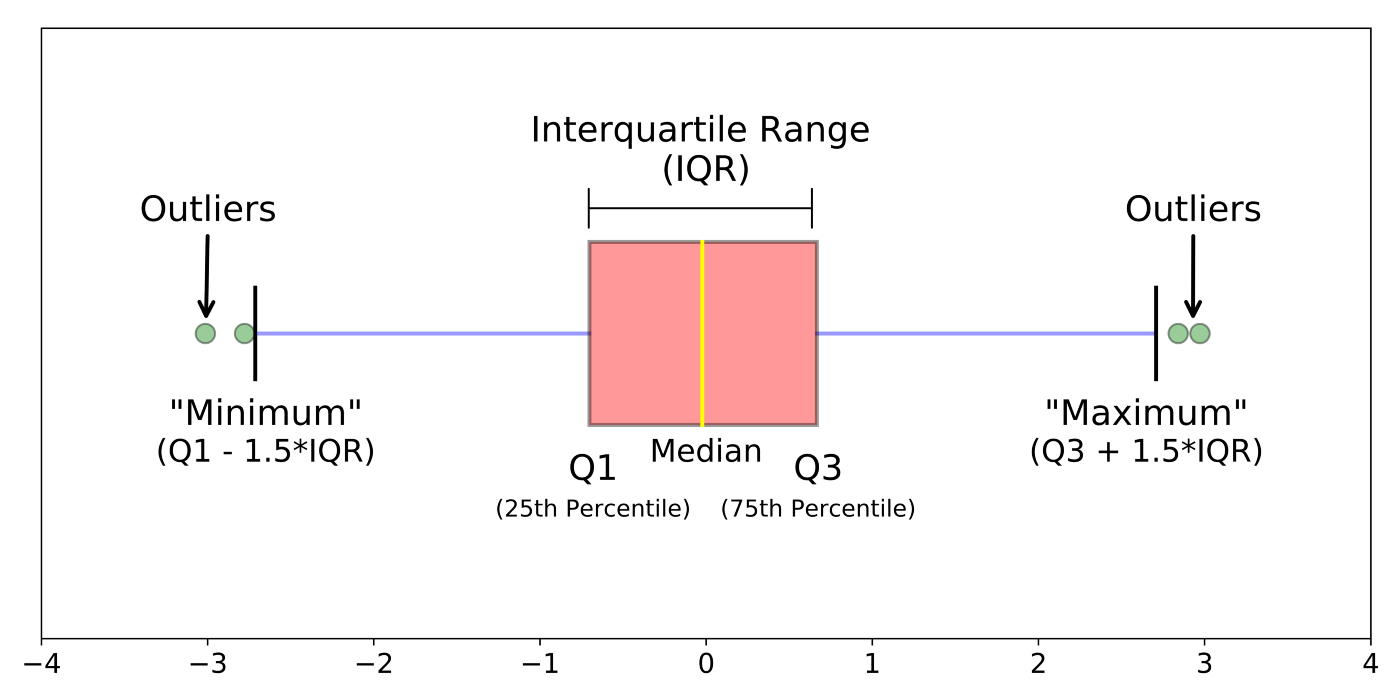

**Interquartile range**

IQR mendeskripsi bagian tengah atau 50% dari nilai jika diurutkan dari terendah ke tertinggi.

Untuk mendapatkan nilai IQR, langkah pertama adalah menemukan ```median``` dari ```batas bawah (Q1)``` dan ```batas atas (Q3)``` dari distribusi data.

IQR adalah beda antara Q3 dan Q1.

Kemudian setelah mendapatkan IQR, kita akan menghitung whisker minimal (iqr_lower) dan maksimal (iqr_upper).

Nilai diluar iqr_lower dan iqr_upper adalah outlier.

In [60]:
# FUNGSI OUTLIER RULE
# kuartil bawah
low_q=df['potassium'].quantile(0.25)
# kuartil atas
upr_q=df['potassium'].quantile(0.75)
# jarak antar kuartil
iq_d=df['potassium'].quantile(0.75)-df['potassium'].quantile(0.25)

def boxplot_outlier (potassium):
    if (potassium>upr_q+1.5*iq_d) or (potassium<low_q-1.5*iq_d):
        return "Outlier"
    else:
        return "Not Outlier"

In [61]:
df['result_boxplot']=df['potassium'].apply(boxplot_outlier)
df.head()

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma,amd,result_hampel,result_boxplot
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier,736.48485,Outlier,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier,857.69697,Outlier,Outlier
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier,548.00000,Outlier,Outlier
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched,Not Outlier,18.66667,Not Outlier,Not Outlier
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched,Not Outlier,82.00000,Not Outlier,Not Outlier


### penanganan Outlier pada dataset titanic

<AxesSubplot:>

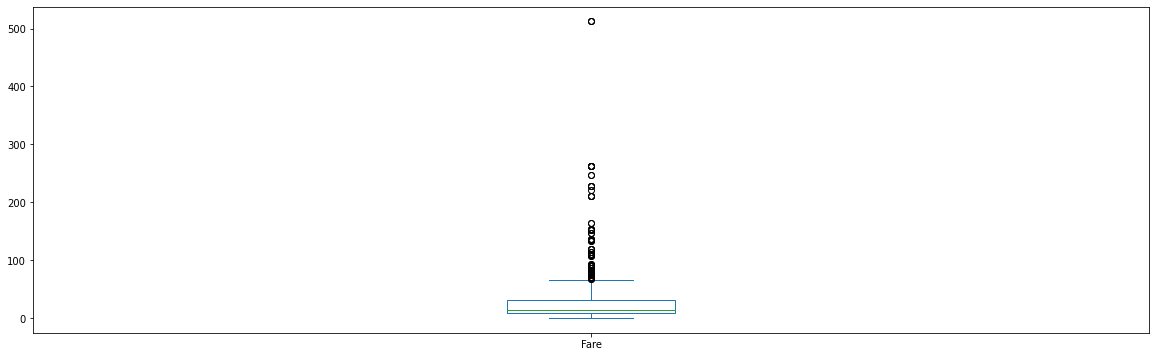

In [64]:
df_titanic.Fare.plot.box()

<details>

Penjelasan IQR
![0_3FE0spyQlEEWhYV5%281%29.png](attachment:0_3FE0spyQlEEWhYV5%281%29.png)
    
Hubungan IQR pada Box plot
![1_2c21SkzJMf3frPXPAR_gZA.png](attachment:1_2c21SkzJMf3frPXPAR_gZA.png)
</details>

In [65]:
# menghitung Q1 dan Q3
q1 = df_titanic['Fare'].quantile(0.25)
q3 = df_titanic['Fare'].quantile(0.75)

# menghitung IQR
iqr = q3 - q1

# menghitung batas bawah dan batas atas
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr

In [66]:
# print hasil
(iqr_lower, iqr_upper)

(-26.724, 65.6344)

In [67]:
# contoh outlier dengan nilai kurang dari iqr_lower
df_titanic[df_titanic.Fare < iqr_lower]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [68]:
# contoh outlier dengan nilai lebih dari iqr_upper
df_titanic[df_titanic.Fare > iqr_upper].sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C


In [69]:
(df_titanic.Fare > iqr_upper).sum()

116

Apa yang harus kita lakukan, pilihan opsinya:
1. Membuang outlier tersebut.
2. Melakukan imputasi nilai. 

Disini kami contohkan untuk melakukan imputasi menggunakan mean.

In [70]:
# ganti nilai outliner dengan na sehingga menjadi missing value
df_titanic['Fare_iqr'] = df_titanic['Fare']
df_titanic.loc[df_titanic['Fare_iqr'] < iqr_lower, 'Fare_iqr'] = pd.NA
df_titanic.loc[df_titanic['Fare_iqr'] > iqr_upper, 'Fare_iqr'] = pd.NA

In [71]:
# cek implementasi missing value
df_titanic.Fare_iqr.isna().sum()

116

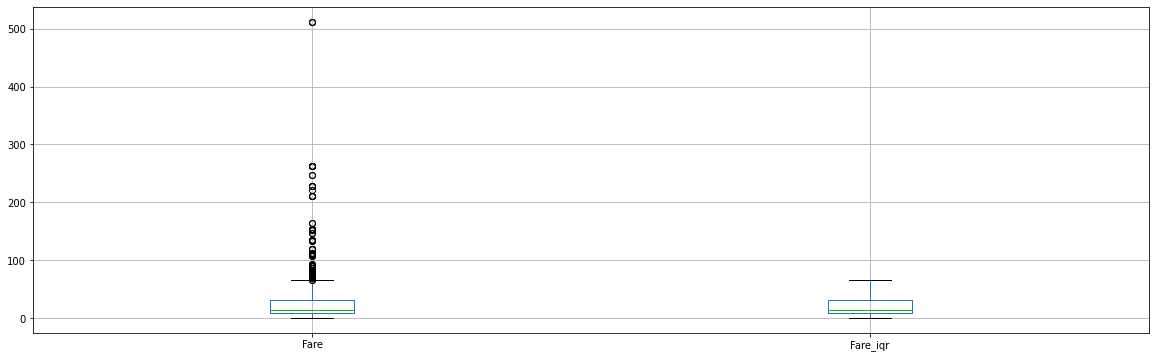

In [72]:
# imputasi NaN dengan mean

df_titanic['Fare_iqr'].fillna(df_titanic.Fare.mean(),inplace=True)

# tampilkan box plot
boxplot = df_titanic.boxplot(column=['Fare','Fare_iqr'])

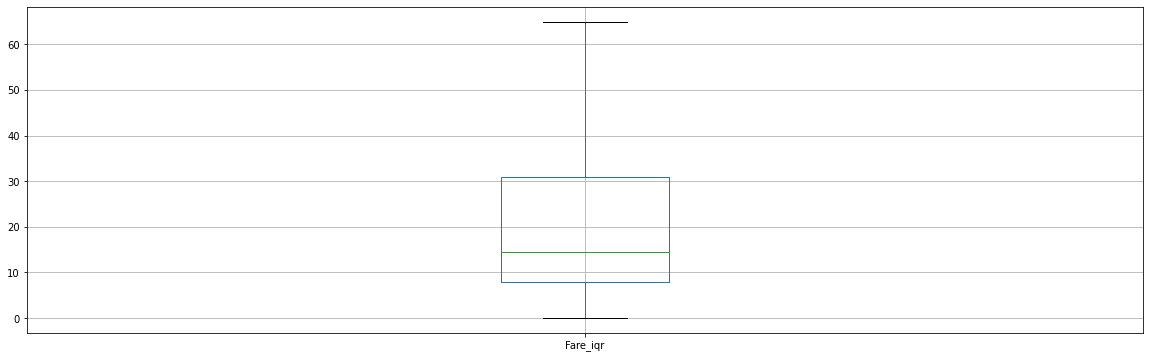

In [73]:
boxplot = df_titanic.boxplot(column=['Fare_iqr'])

__Simpulan__: Perlu kehati-hatian dalam mengimplementasikan metode IQR. IQR dapat digunakan apabila sebaran data kita sempit.

### Deteksi outlier secara multivariate

Deteksi outlier bedasarkan pengamatan terhadap lebih dari 1 features biasa dikenal dengan multivariate outlier detections. 

Dalam kasus ini kita coba mengkoreksi data outlier ```Fare``` dengan bantuan dari variable lain yakni ```Age```.

Kemudian kita melihat apakah ada outlier dengan melihat kerapatan data menggunakan metode [__Density-Based Spatial Clustering of Applications with Noise (DBSCAN)__](https://towardsdatascience.com/dbscan-with-python-743162371dca).
> Metode clustering menggunakan machine learning untuk memisahkan cluster dengan density tinggi dari cluster dengan density rendah.

__Sebelum imputasi__

In [79]:
# load dictionary
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# lakukan standarisasi data agar skalanya sama
scaler = MinMaxScaler()
df_titanic['Fare_scaled'] = scaler.fit_transform(df_titanic[['Fare']])
df_titanic['Age_scaled'] = scaler.fit_transform(df_titanic[['Age_mean_uni']])

# visualisasikan dua features ini dalam bentuk scatter
df_titanic.plot.scatter(y = 'Fare_scaled', x = 'Age_scaled')

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 80 from PyObject

<details>

Penjelasan parameter:
![1_PenJiBtSaeDZD9P9XhLBmA.png](attachment:1_PenJiBtSaeDZD9P9XhLBmA.png)
</details>

In [75]:
DBSCAN_model = DBSCAN(eps = 0.5, metric = 'euclidean', min_samples = 3, n_jobs = -1)

# fit model
clusters = DBSCAN_model.fit_predict(df_titanic[['Fare_scaled', 'Age_scaled']])

# simpan hasil clustering ke kolom baru
df_titanic['Is_outlier'] = clusters

# hasil cluster akan ada dua 0 tidak outlier, 1 merupakan outlier
# pd.Series(clusters).value_counts() ==> cek

NameError: name 'DBSCAN' is not defined

In [ ]:
df_titanic.Is_outlier.value_counts()

0    888
1      3
Name: Is_outlier, dtype: int64

In [ ]:
# lookup data yang outlier
df_titanic[df_titanic['Is_outlier']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1


__Imputasi dengan Mean dari kolom Fare saja__

In [ ]:
# membuat satu kolom baru yang isinya sama dengan Fare
df_titanic['Fare_dbscan'] = df_titanic['Fare']

In [ ]:
# dapatkan mean dari Fare
fare_mean = df_titanic[df_titanic['Is_outlier']==0].Fare.mean()

# isikan nilai mean ke nilai outlier
df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = fare_mean

__Setelah imputasi__

In [ ]:
#pengecekan nilai Fare_dbscan
df_titanic.loc[df_titanic['Is_outlier']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier,Fare_dbscan
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,30.582164
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1,30.582164
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,30.582164


__Imputasi dengan Mean hasil analisis dari kolom Embarked__

Sebagaimana kita ketahui bahwa hasil deteksi outlier di atas, kesemuanya berangkat dari pelabuhan C dengan seri ```Ticket``` yang sama. 

Dibandingkan menggunakan mean dari seluruh penumpang, kita bisa coba gunakan mean dari penumpang lain dari kelompok pemberangkatan ```Embarked``` yang sama.

In [ ]:
df_titanic.loc[df_titanic['Is_outlier']==0, ['Fare','Embarked']].groupby(by='Embarked').agg(['describe'])

Fare                                                           \
         describe                                                            
            count       mean        std     min      25%      50%      75%   
Embarked                                                                     
C           165.0  51.729143  57.953950  4.0125  13.4167  28.7125  76.7292   
Q            77.0  13.276030  14.188047  6.7500   7.7500   7.7500  15.5000   
S           646.0  27.243651  35.952905  0.0000   8.0500  13.0000  27.9000   

                   
                   
              max  
Embarked           
C         262.375  
Q          90.000  
S         263.000

In [ ]:
# isikan ke nilai outlier yang sudah jadi NA
fare_mean_C = df_titanic[(df_titanic['Is_outlier'] == 0) & (df_titanic['Embarked'] == 'C')].Fare.mean()
df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = fare_mean_C

In [ ]:
#pengecekan nilai Fare_dbscan
df_titanic.loc[df_titanic['Is_outlier']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier,Fare_dbscan
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,51.729143
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1,51.729143
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,51.729143


__Jika kita mengasumsikan terjadi salah ketik di nama tiket__

Dari deskripsi statistik masing-masing group ```Embarked``` mean untuk data ```Fare``` penumpang yang berangkat dari pelabuhan C memiliki mean di nilai ```51.73```. 

Kita dapat juga berasumsi bahwa outlier ```512.3292``` itu bisa jadi typo dan mungkin maksudnya ```51.2329```

In [ ]:
# langsung koreksi 
# df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = 51.2329

__Simpulan__: Untuk mempertajam analisis kita saat mendeteksi outlier, kita bisa menggunakan kolom lain sebagai fitur tambahan dan mengimplementasikannya menggunakan DBSCAN.

Kita menggunakan kolom Ticket sebagai fitur yang dapat membantu kita mendeteksi outlier pada kolom Fare.

### Winsorization

merupakan salah satu metode transformasi statistik dengan membatasi nilai-nilai ekstrim data.
Disebut Winsorization karena metode ini ditemukan oleh biostatistisi Charles P. Winsor (1895–1951).
Strategi umum dari Winsorization adalah dengan menspesifikasi persentil data.
Winsorization 90% berarti 
* mengganti semua data di bawah 5% persentil menjadi 5%
* mengganti semua data di atas 95% persentil menjadi 95%

In [80]:
# Misalkan kita memiliki list data :
dataA=[3, 14, 16, 16, 17, 29, 34, 36, 39, 47, 59, 64, 65, 66, 68, 79, 91, 98]
import numpy as np
q05=np.quantile(dataA, .05)
q95=np.quantile(dataA, .95)
print(q05)
print(q95)

12.350000000000001
92.05


In [83]:
dataA

[3, 14, 16, 16, 17, 29, 34, 36, 39, 47, 59, 64, 65, 66, 68, 79, 91, 98]

In [101]:
dataB=[]
for i in dataA:
    if (i<q05):
        i=q05
    elif (i>q95):
        i=q95
    dataB.append(i)
            
    
    
print('dataA :{}'. format(dataA))        
print('dataA :{}'.format(dataB))

dataA :[3, 14, 16, 16, 17, 29, 34, 36, 39, 47, 59, 64, 65, 66, 68, 79, 91, 98]
dataA :[12.350000000000001, 14, 16, 16, 17, 29, 34, 36, 39, 47, 59, 64, 65, 66, 68, 79, 91, 92.05]


# Feature Enginering 

Dari hasil sementara EDA, tanamkan hal berikut di pikiran kita:
1. Apakah ada kemungkinan untuk mendapatkan tambahan informasi atau mengurangi noise dari datanya.
2. Bisakah kita mengkombinasikan data dalam bentuk berbeda, sehingga menjadi lebih informatif.
3. Adakah kemungkinan kita untuk menggunakan data tambahan dari eksternal.

Sumber: https://towardsdatascience.com/what-is-feature-engineering-bfd25b2b26b2

Kunci: __KREATIF !__

## Ekstraksi inisial dari kolom Name sebagai fitur

Jika kita telusuri di kolom name akan terlihat bahwa kolom ini adalah kolom yang sangat unik dengan tingkat cardinality yang tinggi. 

Beberapa dari kita mungkin akan melakukan drop terhadap kolom ini.

Namun jika bisa lebih teliti, ada satu pola yang kita bisa ekstrak dan memberikan nilai tambah pada dataset kita.

Dalam hal ini, kita akan melakukan ekstraksi gelar sosial pada nama seperti Mr. Miss. Mrs. sebagai menggunakan regex.

Beberapa fungsi dan library yang digunakan:
1. [```RegEx```](https://docs.python.org/3/howto/regex.html).
2. ```df.column.replace()```.
3. ```df.column.value_counts()```
4. Library [```One Hot Encoder```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).
5. dst.

In [ ]:
df_titanic[['Name']].sample(5)

,Name
56,"Rugg, Miss. Emily"
855,"Aks, Mrs. Sam (Leah Rosen)"
845,"Abbing, Mr. Anthony"
468,"Scanlan, Mr. James"
357,"Funk, Miss. Annie Clemmer"


In [ ]:
# extract gelar pada nama menggunakan regex dan simpan ke kolom baru
df_titanic['Initial'] = df_titanic.Name.str.extract('(\w+)\.')

In [ ]:
# cek distribusi count
df_titanic.Initial.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Initial, dtype: int64

In [ ]:
# melakukan perbaikan atas inisial yang munkin salah tulis, atau tidak sesuai kriteria
# menggunakan fungsi .replace()

replace_dict =  {'Mlle': 'Miss',
                 'Mme': 'Miss',
                 'Ms': 'Miss',
                 'Dr': 'Mr',
                 'Major': 'Mr',
                 'Lady': 'Mrs',
                 'Countess': 'Mrs',
                 'Jonkheer': 'Other',
                 'Col': 'Other',
                 'Rev': 'Other',
                 'Capt': 'Mr',
                 'Sir': 'Mr',
                 'Don': 'Mr'}

df_titanic['Initial'].replace(replace_dict,inplace=True)

In [ ]:
# cek distribusi count setelah perbaikan

df_titanic.Initial.value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

__Simpulan__: Telah diekstraksi data dari kolom Name menjadi informasi yang bernilai tambah, dan disimpan pada kolom Initial.

## Pengelompokan penumpang berdasarkan kolom Age (Binning)

[Binning](https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950) adalah teknik mengkonversi data numerical menjadi categorical, dengan menggunakan range.

Fungsi yang digunakan, [```pd.cut()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html).

Misalkan:

|Age|Category|
|--- |--- |
|0-15|child|
|16-30|young_adult|
|31-50|adult|
|>50|elderly|

In [ ]:
# membuat varible baru bernama cut_points
# merupakan batas dari setiap kategori
cut_points = [0, 15, 30, 50, 100]

# membuat label atas kategorinya
age_label = ['child', 'young_adult', 'adult', 'elderly']

# implementasi label tersebut dengan membuat kolom baru bernama age_label
df_titanic['Age_group'] = pd.cut(df_titanic['Age_mean_uni'], bins=cut_points, labels=age_label, include_lowest=True)

In [ ]:
# print hasil implementasi
df_titanic.sample(3)[['Age_group','Age_mean_uni']]

,Age_group,Age_mean_uni
497,young_adult,29.699118
79,young_adult,30.000000
240,young_adult,29.699118


__Simpulan__: Telah dikategorikan range ```Age``` pada kolom ```Age_group```.

# Transformasi Variabel

## Encoding

Encoding merupakan metode untuk mengubah data kategorikal ke dalam format bilangan bulat. Ada beberapa macam encoding, antara lain label encoding, binary encoding, hash encoding, target encoding, dll. Untuk melakukan encoding kita bisa menggunakan :
* library LabelEncoder.
* dictionary {}.
* df.Series.map().
* dst.


### Label Encoding

Digunakan untuk mengubah sekumpulan label ke dalam format integer sehingga bisa dilakukan komputasi.

Label encoding digunakan untuk mengubah data categorical menjadi nominal.

### Kolom Sex

In [ ]:
# cek ada berapa label pada kolom sex
df_titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

Karena hanya ada 2 distinct values (low cardinality), kita cukup pakai dictionary untuk labeling.

In [ ]:
# membuat dictionary, 0 untuk male dan 1 untuk female
label_sex = {'male':0,'female':1}

# gunakan fungsi map pada pandas untuk mengaplikasikan labeling
df_titanic['Sex_enc'] = df_titanic['Sex'].map(label_sex)

# print hasil implementasi
df_titanic[['Name','Sex','Sex_enc']].sample(3)

,Name,Sex,Sex_enc
398,"Pain, Dr. Alfred",male,0
664,"Lindqvist, Mr. Eino William",male,0
840,"Alhomaki, Mr. Ilmari Rudolf",male,0


__Simpulan__: kategori male dan female sudah berubah menjadi 0 dan 1.

### Dictionary

### Kolom Embarked

Jika jumlah kelas pada variabel kategori sangat banyak (high cardinality).

Kita __tidak mungkin melakukannya secara manual__ menggunakan dictionary. 

Oleh karenanya kita perlu menggunakan bantuan library salah satunya adalah [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) di scikit learn.

In [ ]:
# load library
from sklearn.preprocessing import LabelEncoder

# inisiasi encoder
le = LabelEncoder()

# fiting dan transform ke model
df_titanic['Embarked_enc'] = le.fit_transform(df_titanic['Embarked'])

In [ ]:
# print hasil implementasi
df_titanic[['Name','Embarked','Embarked_enc']].sample(3)

,Name,Embarked,Embarked_enc
394,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",S,2
292,"Levy, Mr. Rene Jacques",C,0
317,"Moraweck, Dr. Ernest",S,2


__Simpulan__: kategori C, Q, dan S sudah berubah menjadi 0, 1 dan 2.

### One Hot Encoding

* Pada one hot encoding, kita mengkonversi satu feature menjadi beberapa fitur yang nilainya 0 atau 1.


### Kolom Initial

Dari hasil ekstraksi fitur, kita memperoleh lima jenis kategorikal.

Sebelumnya kita sudah kenal cara melakukan encoding dengan menggunakan dictionary dan LabelEncoder.

Untuk kali ini akan kita implementasikan satu teknik lainnya, yaitu One Hot Encoding.

__Kenapa kita menggunakannya?__

Label Encoding adalah kategori sekarang memiliki [urutan (natural order)](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/). 

Komputer secara alami akan memberikan angka yang lebih tinggi, bobot yang lebih tinggi. 

Untuk mengatasinya kita menggunakan One Hot Encoding.

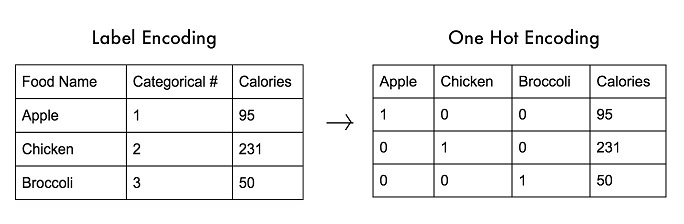

Sumber: https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179

In [ ]:
# load library 
from sklearn.preprocessing import OneHotEncoder 

# inisiasi encoder 
ohc = OneHotEncoder(handle_unknown='ignore')

# fit dan transform
new_features = ohc.fit_transform(df_titanic[['Initial']])

# masukan ke dataframe hasilnya
cols_name= [x for x in df_titanic['Initial'].unique()]
df_initial_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_initial_ohc.sample(3)

,Mr,Mrs,Miss,Master,Other
215,0.0,1.0,0.0,0.0,0.0
655,0.0,0.0,1.0,0.0,0.0
419,0.0,1.0,0.0,0.0,0.0


In [ ]:
# gabung hasilnya ke df_titanic
df_titanic = pd.concat([df_titanic, df_initial_ohc], axis=1)

In [ ]:
# print hasil implementasi
df_titanic.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_dbscan,Initial,Age_group,Sex_enc,Embarked_enc,Mr,Mrs,Miss,Master,Other
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.35,...,12.35,Other,elderly,0,1,0.0,0.0,0.0,0.0,1.0
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.75,...,7.75,Mr,young_adult,0,1,0.0,0.0,1.0,0.0,0.0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.00,...,0.00,Mr,young_adult,0,2,0.0,0.0,1.0,0.0,0.0


__Simpulan__: Sudah diimplementasikan OHE pada kolom ```Initial```.

### Kolom Age_group

Sama seperti sebelumnya, kita akan implementasikan OHE untuk kolom ```Age_group```.

In [ ]:
# fit dan transform
new_features = ohc.fit_transform(df_titanic[['Age_group']])

# masukan ke dataframe hasilnya
cols_name= [x for x in df_titanic['Age_group'].unique()]
df_age_group_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_age_group_ohc.sample(3)

,young_adult,adult,elderly,child
766,0.0,0.0,0.0,1.0
557,0.0,0.0,0.0,1.0
749,1.0,0.0,0.0,0.0


In [ ]:
# gabung hasilnya ke df_titanic
df_titanic = pd.concat([df_titanic, df_age_group_ohc], axis=1)

In [ ]:
# print hasil implementasi
df_titanic.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_enc,Mr,Mrs,Miss,Master,Other,young_adult,adult,elderly,child
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,...,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,...,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,...,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


__Simpulan__: Sudah diimplementasikan OHE pada kolom ```Age_group```.

In [ ]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_mean_uni', 'Age_median_uni',
       'Age_mean_multi', 'Fare_iqr', 'Fare_scaled', 'Age_scaled', 'Is_outlier',
       'Fare_dbscan', 'Initial', 'Age_group', 'Sex_enc', 'Embarked_enc', 'Mr',
       'Mrs', 'Miss', 'Master', 'Other', 'young_adult', 'adult', 'elderly',
       'child'],
      dtype='object')

In [ ]:
columns_to_keep = ['Survived', 'Pclass', 'Fare_dbscan', 'Sex_enc', 'Embarked_enc', 'Mr',
                   'Mrs', 'Miss', 'Master', 'Other', 'young_adult', 'adult', 'elderly',
                   'child']

In [ ]:
df_titanic = df_titanic[columns_to_keep]

In [ ]:
df_titanic.head(3)

,Survived,Pclass,Fare_dbscan,Sex_enc,Embarked_enc,Mr,Mrs,Miss,Master,Other,young_adult,adult,elderly,child
0,0,3,7.2500,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,71.2833,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,3,7.9250,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Ekstract Date Time

* Terdapat masa dimana pada suatu masalah prediktif, variabel waktu memiliki kontribusi tertentu.
* Misalkan, pada data time series kita menemukan adanya siklus pada hari/bulan/jam tertentu. Untuk itu, kita perlu memunculkan potongan informasi waktu tersebut.

### Mengekstrak Potongan Tanggal atau Waktu dari Timestamp

In [102]:
import pandas as pd
data_waktu=pd.read_csv('TPIA.csv')
data_wkt=data_waktu[['date', 'previous', 'open_price', 'close']].copy()
data_wkt['date'] = pd.to_datetime(data_wkt['date'])
data_wkt.head()

,date,previous,open_price,close
0,2019-07-29 09:00:28,6100.0,6025.0,6075.0
1,2019-08-19 10:00:00,7750.0,7750.0,7925.0
2,2019-09-19 11:01:00,8475.0,8500.0,8425.0
3,2019-09-20 10:44:00,8425.0,8375.0,8350.0
4,2019-10-21 11:00:00,9450.0,9450.0,9450.0


### Mengekstrak tanggal saja

In [103]:
data_wkt['tanggal'] = data_wkt['date'].dt.date
data_wkt.head()

,date,previous,open_price,close,tanggal
0,2019-07-29 09:00:28,6100.0,6025.0,6075.0,2019-07-29
1,2019-08-19 10:00:00,7750.0,7750.0,7925.0,2019-08-19
2,2019-09-19 11:01:00,8475.0,8500.0,8425.0,2019-09-19
3,2019-09-20 10:44:00,8425.0,8375.0,8350.0,2019-09-20
4,2019-10-21 11:00:00,9450.0,9450.0,9450.0,2019-10-21


### Mengekstrak jam saja

In [104]:
data_wkt['jam'] = data_wkt['date'].dt.time
data_wkt.head()

,date,previous,open_price,close,tanggal,jam
0,2019-07-29 09:00:28,6100.0,6025.0,6075.0,2019-07-29,09:00:28
1,2019-08-19 10:00:00,7750.0,7750.0,7925.0,2019-08-19,10:00:00
2,2019-09-19 11:01:00,8475.0,8500.0,8425.0,2019-09-19,11:01:00
3,2019-09-20 10:44:00,8425.0,8375.0,8350.0,2019-09-20,10:44:00
4,2019-10-21 11:00:00,9450.0,9450.0,9450.0,2019-10-21,11:00:00


### Mengekstrak tahun

In [105]:
data_wkt['tahun'] = data_wkt['date'].dt.year
data_wkt.head()

,date,previous,open_price,close,tanggal,jam,tahun
0,2019-07-29 09:00:28,6100.0,6025.0,6075.0,2019-07-29,09:00:28,2019
1,2019-08-19 10:00:00,7750.0,7750.0,7925.0,2019-08-19,10:00:00,2019
2,2019-09-19 11:01:00,8475.0,8500.0,8425.0,2019-09-19,11:01:00,2019
3,2019-09-20 10:44:00,8425.0,8375.0,8350.0,2019-09-20,10:44:00,2019
4,2019-10-21 11:00:00,9450.0,9450.0,9450.0,2019-10-21,11:00:00,2019


### Mengekstrak kuartal

In [106]:
data_wkt['kuartal'] = data_wkt['date'].dt.quarter
data_wkt.head()

,date,previous,open_price,close,tanggal,jam,tahun,kuartal
0,2019-07-29 09:00:28,6100.0,6025.0,6075.0,2019-07-29,09:00:28,2019,3
1,2019-08-19 10:00:00,7750.0,7750.0,7925.0,2019-08-19,10:00:00,2019,3
2,2019-09-19 11:01:00,8475.0,8500.0,8425.0,2019-09-19,11:01:00,2019,3
3,2019-09-20 10:44:00,8425.0,8375.0,8350.0,2019-09-20,10:44:00,2019,3
4,2019-10-21 11:00:00,9450.0,9450.0,9450.0,2019-10-21,11:00:00,2019,4


### Mengekstrak bulan

In [107]:
data_wkt['bulan'] = data_wkt['date'].dt.month
data_wkt.head()

,date,previous,open_price,close,tanggal,jam,tahun,kuartal,bulan
0,2019-07-29 09:00:28,6100.0,6025.0,6075.0,2019-07-29,09:00:28,2019,3,7
1,2019-08-19 10:00:00,7750.0,7750.0,7925.0,2019-08-19,10:00:00,2019,3,8
2,2019-09-19 11:01:00,8475.0,8500.0,8425.0,2019-09-19,11:01:00,2019,3,9
3,2019-09-20 10:44:00,8425.0,8375.0,8350.0,2019-09-20,10:44:00,2019,3,9
4,2019-10-21 11:00:00,9450.0,9450.0,9450.0,2019-10-21,11:00:00,2019,4,10


### Mengekstrak Hari


In [108]:
data_wkt['hari'] = data_wkt['date'].dt.dayofweek
data_wkt.head()

,date,previous,open_price,close,tanggal,jam,tahun,kuartal,bulan,hari
0,2019-07-29 09:00:28,6100.0,6025.0,6075.0,2019-07-29,09:00:28,2019,3,7,0
1,2019-08-19 10:00:00,7750.0,7750.0,7925.0,2019-08-19,10:00:00,2019,3,8,0
2,2019-09-19 11:01:00,8475.0,8500.0,8425.0,2019-09-19,11:01:00,2019,3,9,3
3,2019-09-20 10:44:00,8425.0,8375.0,8350.0,2019-09-20,10:44:00,2019,3,9,4
4,2019-10-21 11:00:00,9450.0,9450.0,9450.0,2019-10-21,11:00:00,2019,4,10,0


### Mengoperasikan tanggal

In [109]:
from datetime import timedelta
data_wkt['tgl_migdep'] = data_wkt['date'] + timedelta(days=7)
data_wkt.head()

,date,previous,open_price,close,tanggal,jam,tahun,kuartal,bulan,hari,tgl_migdep
0,2019-07-29 09:00:28,6100.0,6025.0,6075.0,2019-07-29,09:00:28,2019,3,7,0,2019-08-05 09:00:28
1,2019-08-19 10:00:00,7750.0,7750.0,7925.0,2019-08-19,10:00:00,2019,3,8,0,2019-08-26 10:00:00
2,2019-09-19 11:01:00,8475.0,8500.0,8425.0,2019-09-19,11:01:00,2019,3,9,3,2019-09-26 11:01:00
3,2019-09-20 10:44:00,8425.0,8375.0,8350.0,2019-09-20,10:44:00,2019,3,9,4,2019-09-27 10:44:00
4,2019-10-21 11:00:00,9450.0,9450.0,9450.0,2019-10-21,11:00:00,2019,4,10,0,2019-10-28 11:00:00


### Menghitung selisih waktu

In [110]:
data_wkt['delta_hari'] = (data_wkt['tgl_migdep'] - data_wkt['date']).dt.days
data_wkt.head()

,date,previous,open_price,close,tanggal,jam,tahun,kuartal,bulan,hari,tgl_migdep,delta_hari
0,2019-07-29 09:00:28,6100.0,6025.0,6075.0,2019-07-29,09:00:28,2019,3,7,0,2019-08-05 09:00:28,7
1,2019-08-19 10:00:00,7750.0,7750.0,7925.0,2019-08-19,10:00:00,2019,3,8,0,2019-08-26 10:00:00,7
2,2019-09-19 11:01:00,8475.0,8500.0,8425.0,2019-09-19,11:01:00,2019,3,9,3,2019-09-26 11:01:00,7
3,2019-09-20 10:44:00,8425.0,8375.0,8350.0,2019-09-20,10:44:00,2019,3,9,4,2019-09-27 10:44:00,7
4,2019-10-21 11:00:00,9450.0,9450.0,9450.0,2019-10-21,11:00:00,2019,4,10,0,2019-10-28 11:00:00,7


## Menciptakan Feature dari Komputasi Matematis

In [111]:
data_cmp=data_waktu[['date', 'previous', 'open_price', 'close']].copy()
data_cmp.head()

,date,previous,open_price,close
0,2019-07-29 09:00:28,6100.0,6025.0,6075.0
1,2019-08-19 10:00:00,7750.0,7750.0,7925.0
2,2019-09-19 11:01:00,8475.0,8500.0,8425.0
3,2019-09-20 10:44:00,8425.0,8375.0,8350.0
4,2019-10-21 11:00:00,9450.0,9450.0,9450.0


### Operasi antar kolom

In [112]:
data_cmp['Selisih']=data_cmp['close']-data_cmp['open_price']
data_cmp.head()

,date,previous,open_price,close,Selisih
0,2019-07-29 09:00:28,6100.0,6025.0,6075.0,50.0
1,2019-08-19 10:00:00,7750.0,7750.0,7925.0,175.0
2,2019-09-19 11:01:00,8475.0,8500.0,8425.0,-75.0
3,2019-09-20 10:44:00,8425.0,8375.0,8350.0,-25.0
4,2019-10-21 11:00:00,9450.0,9450.0,9450.0,0.0


### Operasi dengan skalar

In [113]:
data_cmp['add_close']=data_cmp['close']+20000
data_cmp.head()

,date,previous,open_price,close,Selisih,add_close
0,2019-07-29 09:00:28,6100.0,6025.0,6075.0,50.0,26075.0
1,2019-08-19 10:00:00,7750.0,7750.0,7925.0,175.0,27925.0
2,2019-09-19 11:01:00,8475.0,8500.0,8425.0,-75.0,28425.0
3,2019-09-20 10:44:00,8425.0,8375.0,8350.0,-25.0,28350.0
4,2019-10-21 11:00:00,9450.0,9450.0,9450.0,0.0,29450.0


### Memberikan kategori

In [114]:
def ur (selisih):
    if selisih>0 :
        return 'Untung'
    elif selisih==0:
        return 'Sama'
    else:
        return 'Rugi'
data_cmp['kategori']=data_cmp['Selisih'].apply(ur)
data_cmp.head()

,date,previous,open_price,close,Selisih,add_close,kategori
0,2019-07-29 09:00:28,6100.0,6025.0,6075.0,50.0,26075.0,Untung
1,2019-08-19 10:00:00,7750.0,7750.0,7925.0,175.0,27925.0,Untung
2,2019-09-19 11:01:00,8475.0,8500.0,8425.0,-75.0,28425.0,Rugi
3,2019-09-20 10:44:00,8425.0,8375.0,8350.0,-25.0,28350.0,Rugi
4,2019-10-21 11:00:00,9450.0,9450.0,9450.0,0.0,29450.0,Sama
